In [3]:
#import packages


#essentials
import pandas as pd
import numpy as np
import os
from Bio import SeqIO

#pairwise distances
import Levenshtein as lv

#clustering
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

#for plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#list all files containing the sequences (they should be fasta files)

fasta_files = [f for f in os.listdir() if f.endswith('.fasta')] # list comprehension

fasta_files

#create table with the sequences and their IDs

from Bio import SeqIO

all_data = []

for fasta_file in fasta_files:

    records = list(SeqIO.parse(fasta_file, "fasta"))
    data = {'filename': os.path.basename(fasta_file),
            'sequence_id': [record.id for record in records],
           'sequence': [str(record.seq) for record in records]}
    all_data.append(pd.DataFrame(data))

start_df = pd.concat(all_data, ignore_index=True) #put the table in the correct format

start_df = start_df.sort_values(by='sequence_id') #sort values by sequence ID

start_df

#create table with the sequences and their IDs

from Bio import SeqIO

all_data = []

for fasta_file in fasta_files:

    records = list(SeqIO.parse(fasta_file, "fasta"))
    data = {'filename': os.path.basename(fasta_file),
            'sequence_id': [record.id for record in records],
           'sequence': [str(record.seq) for record in records]}
    all_data.append(pd.DataFrame(data))

start_df = pd.concat(all_data, ignore_index=True) #put the table in the correct format

start_df = start_df.sort_values(by='sequence_id') #sort values by sequence ID

start_df

filename       sequence_id  \
1086  vardb_var2csa.cleaned.sequences.aa.fasta     PA0007-C.g493   
1087  vardb_var2csa.cleaned.sequences.aa.fasta      PA0011-C.g14   
1179  vardb_var2csa.cleaned.sequences.aa.fasta     PA0013-C.g168   
1180  vardb_var2csa.cleaned.sequences.aa.fasta     PA0014-C.g222   
1088  vardb_var2csa.cleaned.sequences.aa.fasta      PA0015-C.g78   
...                                        ...               ...   
964   vardb_var2csa.cleaned.sequences.aa.fasta   SenT231.08.g419   
965   vardb_var2csa.cleaned.sequences.aa.fasta   SenT232.08.g426   
966   vardb_var2csa.cleaned.sequences.aa.fasta  SenT233.08.g1006   
937   vardb_var2csa.cleaned.sequences.aa.fasta    SenV042.05.g45   
947   vardb_var2csa.cleaned.sequences.aa.fasta    SenV092.05.g41   

                                               sequence  
1086  MDKSSIGEKIEEYLEKKSDESKIDQSLKADPSKVQYYGSGGDGYYL...  
1087  MDKSSIGDKIEAYLEKKSNESNIDQSLKADPSEVQYYRSGGDGYYL...  
1179  MDSTSTIANKIEAYLEKKSNDSKIDQSLKADPSKVQYYGSGGDGYY...  
1180  MDSTSTIANKIEAYLEKKSNESDIDQSLKADPSEVEYYRSGGDGDY...  
1088  MDSKTTIAEKIEEYLKEKSNDSKIDELLKADPSEIDYYNFGGDGYY...  
...                                                 ...  
964   MDSTSTIANKIEAYLEKKSNESNIDQSLKADPSEVQYYGSGGDGYY...  
965   MDKSSIGDKIEAYLGAKSNESNIDQSLKADPSKVQYYRSGGDGYYL...  
966   MDKSSIADKIEEYLGAKSDDSKIDQSLKADPSEVQYYRSGGDGYYL...  
937   MDKSSIGDKIEAYLEKKSNESNIEQSLKADPSEIDYYNFGGDGDYL...  
947   MDSKTTIGEKIEAYLKEKSNESNIDQSLKADPSKVQYYGSGGDGYY...  

[1366 rows x 3 columns]

In [55]:
#create a table for the metadata 


metadata_df = pd.read_csv("vardb_var2csa.cleaned.isolates.population.csv").sort_values(by='sequence_id') 

#should match the column from start_df

metadata_df

genome       sequence_id  Country Region
0       PA0007-C     PA0007-C.g493   Gambia    WAF
1       PA0011-C      PA0011-C.g14   Gambia    WAF
2       PA0013-C     PA0013-C.g168   Gambia    WAF
3       PA0014-C     PA0014-C.g222   Gambia    WAF
4       PA0015-C      PA0015-C.g78   Gambia    WAF
...          ...               ...      ...    ...
1361  SenT231.08   SenT231.08.g419  Senegal    WAF
1362  SenT232.08   SenT232.08.g426  Senegal    WAF
1363  SenT233.08  SenT233.08.g1006  Senegal    WAF
1364  SenV042.05    SenV042.05.g45  Senegal    WAF
1365  SenV092.05    SenV092.05.g41  Senegal    WAF

[1366 rows x 4 columns]

In [56]:
#then merge both tables together
#column names + gene names within column should exactly match in both dataframes
merged_df = start_df.merge(metadata_df, on = 'sequence_id',how='inner') 

#save the table
merged_df.to_csv("df_with_geo.csv")

merged_df

filename       sequence_id  \
0     vardb_var2csa.cleaned.sequences.aa.fasta     PA0007-C.g493   
1     vardb_var2csa.cleaned.sequences.aa.fasta      PA0011-C.g14   
2     vardb_var2csa.cleaned.sequences.aa.fasta     PA0013-C.g168   
3     vardb_var2csa.cleaned.sequences.aa.fasta     PA0014-C.g222   
4     vardb_var2csa.cleaned.sequences.aa.fasta      PA0015-C.g78   
...                                        ...               ...   
1361  vardb_var2csa.cleaned.sequences.aa.fasta   SenT231.08.g419   
1362  vardb_var2csa.cleaned.sequences.aa.fasta   SenT232.08.g426   
1363  vardb_var2csa.cleaned.sequences.aa.fasta  SenT233.08.g1006   
1364  vardb_var2csa.cleaned.sequences.aa.fasta    SenV042.05.g45   
1365  vardb_var2csa.cleaned.sequences.aa.fasta    SenV092.05.g41   

                                               sequence      genome  Country  \
0     MDKSSIGEKIEEYLEKKSDESKIDQSLKADPSKVQYYGSGGDGYYL...    PA0007-C   Gambia   
1     MDKSSIGDKIEAYLEKKSNESNIDQSLKADPSEVQYYRSGGDGYYL...    PA0011-C   Gambia   
2     MDSTSTIANKIEAYLEKKSNDSKIDQSLKADPSKVQYYGSGGDGYY...    PA0013-C   Gambia   
3     MDSTSTIANKIEAYLEKKSNESDIDQSLKADPSEVEYYRSGGDGDY...    PA0014-C   Gambia   
4     MDSKTTIAEKIEEYLKEKSNDSKIDELLKADPSEIDYYNFGGDGYY...    PA0015-C   Gambia   
...                                                 ...         ...      ...   
1361  MDSTSTIANKIEAYLEKKSNESNIDQSLKADPSEVQYYGSGGDGYY...  SenT231.08  Senegal   
1362  MDKSSIGDKIEAYLGAKSNESNIDQSLKADPSKVQYYRSGGDGYYL...  SenT232.08  Senegal   
1363  MDKSSIADKIEEYLGAKSDDSKIDQSLKADPSEVQYYRSGGDGYYL...  SenT233.08  Senegal   
1364  MDKSSIGDKIEAYLEKKSNESNIEQSLKADPSEIDYYNFGGDGDYL...  SenV042.05  Senegal   
1365  MDSKTTIGEKIEAYLKEKSNESNIDQSLKADPSKVQYYGSGGDGYY...  SenV092.05  Senegal   

     Region  
0       WAF  
1       WAF  
2       WAF  
3       WAF  
4       WAF  
...     ...  
1361    WAF  
1362    WAF  
1363    WAF  
1364    WAF  
1365    WAF  

[1366 rows x 6 columns]

In [57]:
# Now creating LEvenshtein matrix

#extract sequence info from the table
sequence_dict = dict(zip(merged_df['sequence_id'], merged_df['sequence'])) #create a dictionary which assigns each sequence to its sequence ID
sequence_ids = list(sequence_dict.keys()) #take out sequence IDs
sequences = list(sequence_dict.values()) #take out sequences

#create Levenshtein distance matrix
n = len(sequences)
lev_matrix = [[lv.distance(sequences[i], sequences[j]) for j in range(n)] for i in range(n)]
lev_matrix=pd.DataFrame(lev_matrix)

In [58]:
len(lev_matrix)
len(merged_df)

1366

In [41]:
sequence_dict = dict(zip(merged_df['sequence_id'], merged_df['sequence'])) #create a dictionary which assigns each sequence to its sequence ID

sequence_ids = list(sequence_dict.keys()) #take out sequence IDs
sequences = list(sequence_dict.values()) #take out sequences
 
    
    
lev_matrix.columns = sequence_ids
lev_matrix.index = sequence_ids

#save the matrix

lev_matrix.to_csv("var2CSA_lev_matrix.csv", index=False)

ValueError: Length mismatch: Expected axis has 1365 elements, new values have 1364 elements

/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


<Figure size 800x600 with 0 Axes>

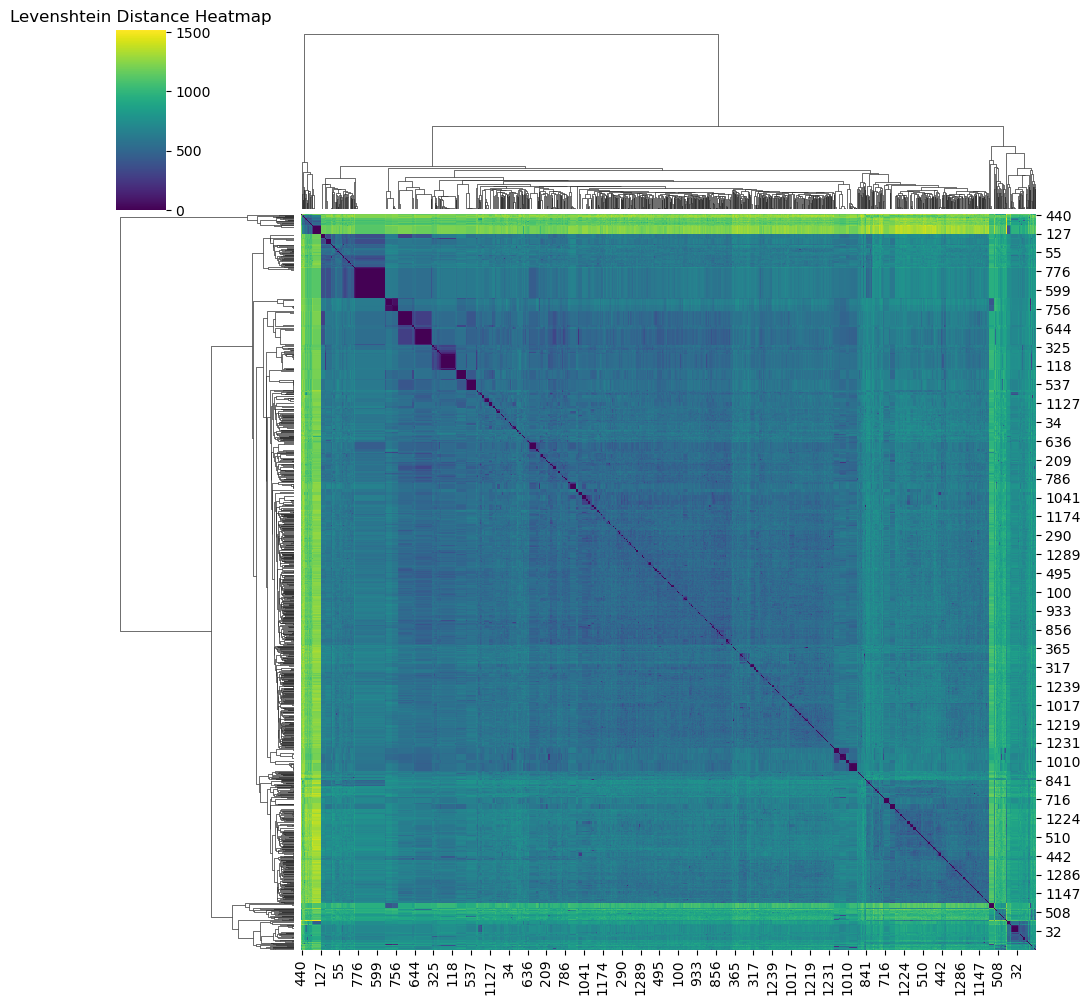

In [10]:
# Plot a clustermap of the Levenshtein distance matrix

plt.figure(figsize=(8, 6))

sns.clustermap(lev_matrix, cmap='viridis')
plt.title("Levenshtein Distance Heatmap")

plt.savefig("var2CSA_heatmap_clustered.png")
plt.show()

In [24]:
#calculate coordinates for 3D MDS plot 
#this might take a while depending on how many sequences you have

#create a new table for the MDS coordinates 
merged_df = pd.read_csv(('df_with_geo.csv'), index_col = 0, nrows=1365)
lev_matrix = pd.read_csv('var2CSA_lev_matrix.csv')
print(merged_df)
print(lev_matrix)


                                      filename       sequence_id  \
0     vardb_var2csa.cleaned.sequences.aa.fasta     PA0007-C.g493   
1     vardb_var2csa.cleaned.sequences.aa.fasta      PA0011-C.g14   
2     vardb_var2csa.cleaned.sequences.aa.fasta     PA0013-C.g168   
3     vardb_var2csa.cleaned.sequences.aa.fasta     PA0014-C.g222   
4     vardb_var2csa.cleaned.sequences.aa.fasta      PA0015-C.g78   
...                                        ...               ...   
1360  vardb_var2csa.cleaned.sequences.aa.fasta   SenT230.08.g702   
1361  vardb_var2csa.cleaned.sequences.aa.fasta   SenT231.08.g419   
1362  vardb_var2csa.cleaned.sequences.aa.fasta   SenT232.08.g426   
1363  vardb_var2csa.cleaned.sequences.aa.fasta  SenT233.08.g1006   
1364  vardb_var2csa.cleaned.sequences.aa.fasta    SenV042.05.g45   

                                               sequence      genome  Country  \
0     MDKSSIGEKIEEYLEKKSDESKIDQSLKADPSKVQYYGSGGDGYYL...    PA0007-C   Gambia   
1     MDKSSIGDKIEAYLEKK

In [25]:
mds_df = pd.DataFrame(merged_df['sequence_id']).sort_index() #we'll keep the sequence IDs from the df table

#3D coordinates
mds_3d = MDS(n_components=3, random_state=42, dissimilarity='precomputed', n_init = 200, max_iter=500) 

mds_results_3d = mds_3d.fit_transform(lev_matrix)

mds_df['mds_3d']=mds_results_3d.tolist()
mds_df['mds_3d_x']=mds_df['mds_3d'].apply(lambda a: a[0]) #take out the 1st coordinate
mds_df['mds_3d_y']=mds_df['mds_3d'].apply(lambda b: b[1]) #take out the 2nd coordinate
mds_df['mds_3d_z']=mds_df['mds_3d'].apply(lambda c: c[2]) #take out the 3rd coordinate

mds_df
mds_df.to_csv("var2CSA_mds_df.csv")

In [27]:
#merge the MDS coordinates with our df
merged_df = merged_df.merge(mds_df, on="sequence_id", how='right')

merged_df

#save merged df
merged_df.to_csv("var2CSA_merged_df.csv")

In [25]:
merged_df = pd.read_csv("var2CSA_merged_df.csv")


pd.Series.unique(merged_df['Region'])

# Define the mapping for regions to continents because 
continent_mapping = {
    'WAF': 'Africa',
    'EAF': 'Africa',
    'Lab': 'Africa',  # Assuming 'Lab' = region in africa
    'WSEA': 'South East Asia',
    'ESEA': 'South East Asia',
    'SAM': 'South America',
    'SAS': 'Central Asia',
    'CAF': 'Africa'
}

merged_df['Continent'] = [continent_mapping.get(region, 'Other') for region in merged_df['Region']]

# Print the updated DataFrame with the new 'Continent' column
print(merged_df.head())


   Unnamed: 0                                  filename    sequence_id  \
0           0  vardb_var2csa.cleaned.sequences.aa.fasta  PA0007-C.g493   
1           1  vardb_var2csa.cleaned.sequences.aa.fasta   PA0011-C.g14   
2           2  vardb_var2csa.cleaned.sequences.aa.fasta  PA0013-C.g168   
3           3  vardb_var2csa.cleaned.sequences.aa.fasta  PA0014-C.g222   
4           4  vardb_var2csa.cleaned.sequences.aa.fasta   PA0015-C.g78   

                                            sequence    genome Country Region  \
0  MDKSSIGEKIEEYLEKKSDESKIDQSLKADPSKVQYYGSGGDGYYL...  PA0007-C  Gambia    WAF   
1  MDKSSIGDKIEAYLEKKSNESNIDQSLKADPSEVQYYRSGGDGYYL...  PA0011-C  Gambia    WAF   
2  MDSTSTIANKIEAYLEKKSNDSKIDQSLKADPSKVQYYGSGGDGYY...  PA0013-C  Gambia    WAF   
3  MDSTSTIANKIEAYLEKKSNESDIDQSLKADPSEVEYYRSGGDGDY...  PA0014-C  Gambia    WAF   
4  MDSKTTIAEKIEEYLKEKSNDSKIDELLKADPSEIDYYNFGGDGYY...  PA0015-C  Gambia    WAF   

                                              mds_3d    mds_3d_x    

In [27]:
import plotly.express as px

# Create the 3D scatter plot
fig = px.scatter_3d(merged_df, x="mds_3d_x", y="mds_3d_y", z="mds_3d_z", hover_data=['sequence_id'], color='Continent',
                    color_discrete_sequence=px.colors.qualitative.Set1)

# Choose camera angles (this is the view that will be used to save the image later)
camera = dict(
    eye=dict(x=1.25, y=1.25, z=0.5)
)

# Change the appearance of the plot and axis labels
fig.update_layout(
    width=1000,
    height=700,
    template='plotly_white',
    scene=dict(
        aspectmode='cube',
        xaxis_title='Similarity Distance X',  # Change the x-axis title here
        yaxis_title='Similarity Distance Y',  # Change the y-axis title here
        zaxis_title='Similarity Distance Z'   # Change the z-axis title here
    ),
    scene_camera=camera
)

# Change the data point size
fig.update_traces(marker_size=6)

# Display the plot
fig.show()

# Save the plot as an interactive HTML file
fig.write_html("var2CSA_3D_MDS_plot.html")


In [28]:
identical_seq_counts = merged_df.sequence.value_counts()
identical_seq_df = pd.DataFrame(identical_seq_counts).reset_index()
identical_seq_df = identical_seq_df.merge(merged_df,on = "sequence", how = "left")
identical_seq_df = identical_seq_df[identical_seq_df['count'] != 1]
identical_seq_df

identical_seq_df.to_csv("var2CSA_identical_sequences.csv")
identical_seq_df

sequence  count  \
0    MDSTSTIAEKIEAYLGAKSDDSKIDELLKADPSEVQYYRSGGDGDY...     54   
1    MDSTSTIAEKIEAYLGAKSDDSKIDELLKADPSEVQYYRSGGDGDY...     54   
2    MDSTSTIAEKIEAYLGAKSDDSKIDELLKADPSEVQYYRSGGDGDY...     54   
3    MDSTSTIAEKIEAYLGAKSDDSKIDELLKADPSEVQYYRSGGDGDY...     54   
4    MDSTSTIAEKIEAYLGAKSDDSKIDELLKADPSEVQYYRSGGDGDY...     54   
..                                                 ...    ...   
534  MDSKTTIAEKIEAYLGAKSNDSKIDQSLKADPSEVQYYGSGGDGYY...      2   
535  MDSTSTIANKIEAYLEKKSNESNIDQLLKADPSEVQYYRSGGDGDY...      2   
536  MDSTSTIANKIEAYLEKKSNESNIDQLLKADPSEVQYYRSGGDGDY...      2   
537  MDKSSIGDKIEAYLEKKSDESNIDQSLKADPSEVQYYRSGGDGDYL...      2   
538  MDKSSIGDKIEAYLEKKSDESNIDQSLKADPSEVQYYRSGGDGDYL...      2   

                                     filename    sequence_id    genome  \
0    vardb_var2csa.cleaned.sequences.aa.fasta  PH0055-C.g568  PH0055-C   
1    vardb_var2csa.cleaned.sequences.aa.fasta  PH0161-C.g139  PH0161-C   
2    vardb_var2csa.cleaned.sequences.aa.fasta  PH0169-C.g476  PH0169-C   
3    vardb_var2csa.cleaned.sequences.aa.fasta  PH0200-C.g135  PH0200-C   
4    vardb_var2csa.cleaned.sequences.aa.fasta   PH0213-C.g30  PH0213-C   
..                                        ...            ...       ...   
534  vardb_var2csa.cleaned.sequences.aa.fasta  QC0210-C.g377  QC0210-C   
535  vardb_var2csa.cleaned.sequences.aa.fasta  QE0438-C.g399  QE0438-C   
536  vardb_var2csa.cleaned.sequences.aa.fasta   QE0447-C.g98  QE0447-C   
537  vardb_var2csa.cleaned.sequences.aa.fasta  PE0123-C.g106  PE0123-C   
538  vardb_var2csa.cleaned.sequences.aa.fasta  PF0525-C.g182  PF0525-C   

      Country Region                                             mds_3d  \
0    Cambodia   ESEA  [-358.2890524575886, 244.21343370866174, -423....   
1    Cambodia   ESEA  [-406.393303277393, 69.95965658047531, 33.3037...   
2    Cambodia   ESEA  [255.26624441492893, -198.8465832108908, 373.5...   
3    Cambodia   ESEA  [-119.28622708088217, 642.745056952997, -326.1...   
4    Cambodia   ESEA  [-68.08501214448364, 100.02312631481395, 379.8...   
..        ...    ...                                                ...   
534   Myanmar   WSEA  [-278.36528850019727, -4.027817406622031, 26.7...   
535      Laos   ESEA  [233.5281514707034, 170.11417412086962, 226.49...   
536      Laos   ESEA  [-137.37490167998874, 231.96679219347962, -240...   
537  Tanzania    EAF  [-209.5075059816206, -351.97979928377316, 314....   
538     Ghana    WAF  [141.99415761418126, -186.59307690094258, -256...   

       mds_3d_x    mds_3d_y    mds_3d_z  
0   -358.289052  244.213434 -423.513225  
1   -406.393303   69.959657   33.303758  
2    255.266244 -198.846583  373.531357  
3   -119.286227  642.745057 -326.197471  
4    -68.085012  100.023126  379.821669  
..          ...         ...         ...  
534 -278.365289   -4.027817   26.794620  
535  233.528151  170.114174  226.492077  
536 -137.374902  231.966792 -240.016277  
537 -209.507506 -351.979799  314.471895  
538  141.994158 -186.593077 -256.191540  

[539 rows x 11 columns]

In [2]:
merged_df = pd.read_csv(("var2CSA_merged_df.csv"),index_col=False)

extra_row = merged_df.iloc[-1].copy()  # Copy the last row
extra_row['sequence_id'] = 'TIM80var1'  # Change to a unique ID
merged_df = pd.concat([merged_df, pd.DataFrame([extra_row])], ignore_index=True)
print(len(merged_df['sequence_id']))


sequence_dict = dict(zip(merged_df['sequence_id'], merged_df['sequence'])) #create a dictionary which assigns each sequence to its sequence ID
sequence_ids = list(sequence_dict.keys()) #take out sequence IDs
sequences = list(sequence_dict.values()) #take out sequences

print(len(sequence_dict))

all_ids = set(merged_df['sequence_id'])
dict_ids = set(sequence_dict.keys())

missing_id = all_ids - dict_ids
print(f"Missing Sequence ID: {missing_id}")

lev_matrix
lev_matrix.columns = sequence_ids
lev_matrix.index = sequence_ids



NameError: name 'pd' is not defined